In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:


# File paths
satellite_img_path = '/home/local/ASURITE/YOURNAME/Desktop/project/dynamicshade/newimages_byeng/3dmodelimage_hour6_row0_col0.png'
gt_shade_img_path = '/home/local/ASURITE/YOURNAME/Desktop/project/dynamicshade/newimages_byeng/gtnew/3dmodelimage_hour6_row0_col0.png'
no_sun_img_path = '/home/local/ASURITE/YOURNAME/Desktop/project/dynamicshade/newimages_byeng/no_sun/3dmodelimage_hour6_row0_col0.png'

# Load images
satellite_img = mpimg.imread(satellite_img_path)
gt_shade_img = mpimg.imread(gt_shade_img_path)
no_sun_img = mpimg.imread(no_sun_img_path)

# Plot images in one row with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(satellite_img)
axs[0].set_title('Satellite Image')
axs[0].axis('off')

axs[1].imshow(gt_shade_img)
axs[1].set_title('Ground Truth Shade')
axs[1].axis('off')

axs[2].imshow(no_sun_img)
axs[2].set_title('No Sun Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/local/ASURITE/YOURNAME/Desktop/project/dynamicshade/newimages_byeng/3dmodelimage_hour6_row0_col0.png'

# Remove the color and keep the only dark areas 

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Function to keep only black areas in the image
def keep_black_areas(image_path, tolerance=0.09):
    # Load image
    img = mpimg.imread(image_path)
    
    # Check if the image has an alpha channel (RGBA), remove it if present
    if img.shape[-1] == 4:
        img = img[..., :3]
    
    print(img)
    print(img.shape)
    
    # # Create a mask for near-black pixels (RGB values close to [0, 0, 0])
    black_mask = np.all(img < tolerance, axis=-1)
    
    # # Create a new image, setting all non-black areas to white
    output_img = np.ones_like(img)  # Start with a white image
    output_img[black_mask] = [0, 0, 0]  # Keep only the black pixels

    return output_img


def subtract_black_areas(gt_shade_img_path, no_sun_img_path, tolerance=0.09):
    # Load the images
    gt_shade_img = mpimg.imread(gt_shade_img_path)
    no_sun_img = mpimg.imread(no_sun_img_path)
    
    # Remove alpha channel if present (i.e., we work only with RGB channels)
    if no_sun_img.shape[-1] == 4:
        no_sun_img = no_sun_img[..., :3]
    
    if gt_shade_img.shape[-1] == 4:
        gt_shade_img = gt_shade_img[..., :3]
    
    # Create a mask for near-black pixels in no_sun_img
    black_mask = np.all(no_sun_img <= tolerance, axis=-1)
    
    # Set the corresponding pixels in gt_shade_img to white where the mask is black
    gt_shade_img[black_mask] = [1, 1, 1]  # Set black regions to white (or any other background color)

    return gt_shade_img

def ensure_black_and_white(result_img, black_threshold=0.1, white_threshold=0.9):
    # Copy the image to avoid modifying the original one
    processed_img = np.copy(result_img)
    
    # Normalize pixel values to [0, 1] if needed (assume image is already normalized between 0 and 1)
    # If your image is in range [0, 255], uncomment the line below:
    # processed_img = processed_img / 255.0

    # Ensure black: Set pixels that are close to black (all RGB values below black_threshold) to [0, 0, 0]
    black_mask = np.all(processed_img <= black_threshold, axis=-1)
    processed_img[black_mask] = [0, 0, 0]
    
    # Ensure white: Set pixels that are close to white (all RGB values above white_threshold) to [1, 1, 1]
    white_mask = np.all(processed_img >= white_threshold, axis=-1)
    processed_img[white_mask] = [1, 1, 1]
    
    # If your image was originally in the range [0, 255], scale back:
    processed_img = (processed_img * 255).astype(np.uint8)

    return processed_img

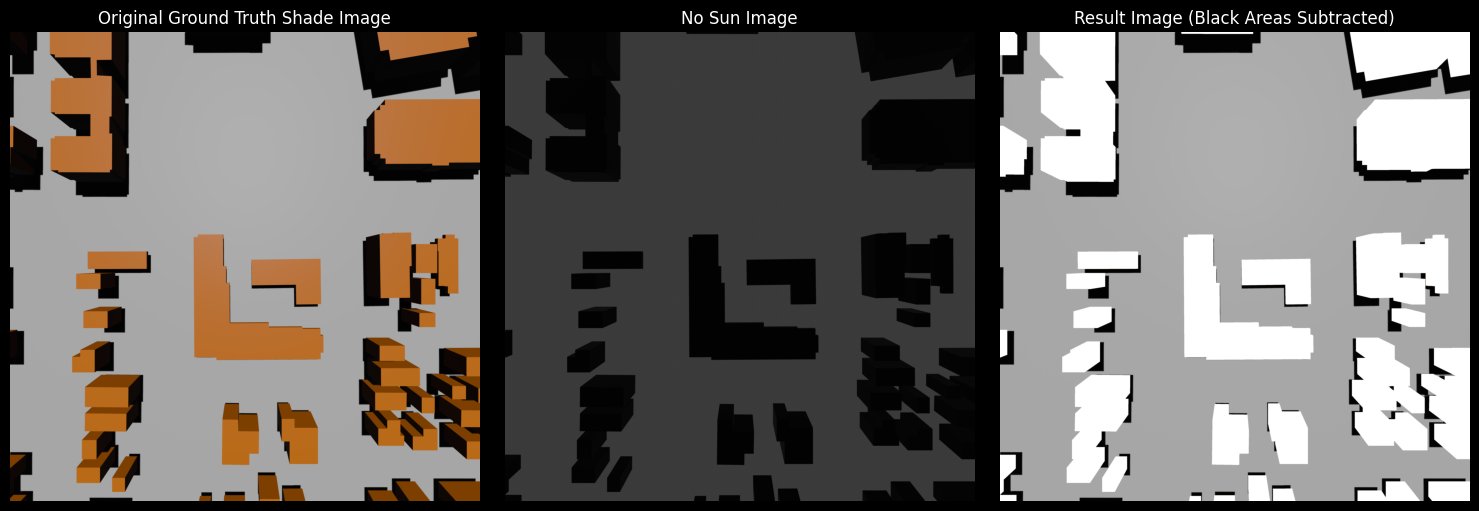

In [5]:
gt_shade_img_path = '/home/local/ASURITE/YOURNAME/Desktop/project/dynamicshade/newimages_byeng/gtnew/3dmodelimage_hour6_row0_col0.png'
no_sun_img_path = '/home/local/ASURITE/YOURNAME/Desktop/project/dynamicshade/newimages_byeng/no_sun/3dmodelimage_hour6_row0_col0.png'

# Apply the function
result_img = subtract_black_areas(gt_shade_img_path, no_sun_img_path)

# Plot the original and result images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original gt_shade_img
gt_shade_img = mpimg.imread(gt_shade_img_path)
axs[0].imshow(gt_shade_img)
axs[0].set_title('Original Ground Truth Shade Image')
axs[0].axis('off')

# No Sun Image
no_sun_img = mpimg.imread(no_sun_img_path)
axs[1].imshow(no_sun_img)
axs[1].set_title('No Sun Image')
axs[1].axis('off')

# Result image after subtracting no_sun_img black areas
axs[2].imshow(result_img)
axs[2].set_title('Result Image (Black Areas Subtracted)')
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [6]:
result_img.shape

(4096, 4096, 3)

<BarContainer object of 4096 artists>

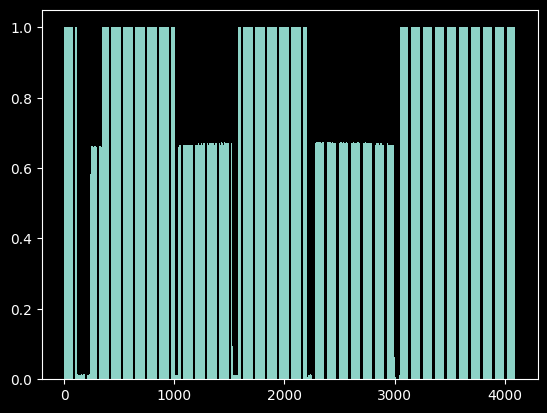

In [29]:
result_img[:, :, -1].shape

data = result_img[:, :, -1]
set(data[0])

plt.bar(np.arange(0,len(data[0])), data[0])

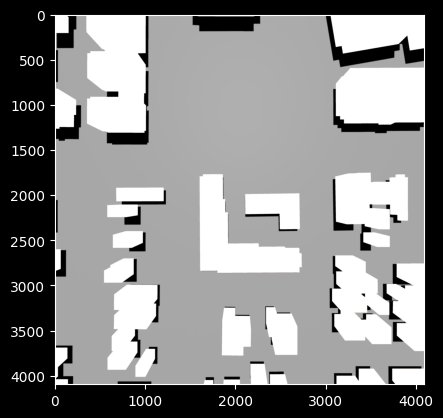

In [37]:
processed_result_img = ensure_black_and_white(result_img)

# Plot the processed result image
plt.imshow(processed_result_img)